# Notebook Context

## Question:
<font size="5">
What is the difference in performance between the classic UNet trained on polar data representation and the classic UNet trained on carthesian data representation?
</font>

## Answer:
<font size="5">
</font>


In [3]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from pprint import pprint

# %matplotlib widget

# Helpers

In [4]:
def load_experiment_config(experiment_config_path):
    experiment_config = pkl.load(open(experiment_config_path, "rb"))
    pprint(experiment_config)
    return experiment_config

In [5]:
def load_experiment_data(experiment_data_path):
    experiment_history = pd.read_csv(experiment_data_path, header=0)
    pprint(experiment_history.columns)
    return experiment_history

In [6]:
def extract_training_coordinates(experiment_config):
    if "polar_training" not in experiment_config["training_config"].keys():
        training_coodinates = "carthesian"
    elif experiment_config["training_config"]["polar_training"]:
        training_coodinates = "polar"
    else:
        training_coodinates = "carthesian"
    
    return training_coodinates

In [7]:
def plot_train_val_metrics(experiment_config, experiment_data, train_metric_names, val_metric_names):
    
    best_metrics = {}
    plt.figure(figsize=(10, 7))
    
    for train_metric_name, val_metric_name in zip(train_metric_names, val_metric_names):
        plt.plot(experiment_data[train_metric_name], label=train_metric_name)
        plt.plot(experiment_data[val_metric_name], label=val_metric_name)
        best_metrics[train_metric_name] = np.round(experiment_data[train_metric_name].max(), 4)
        best_metrics[val_metric_name] = np.round(experiment_data[val_metric_name].max(), 4)

    training_coordinates = extract_training_coordinates(experiment_config)
    
    print("Best Metrics")
    pprint(best_metrics)
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.02))
    plt.title(f"Model: {experiment_config['training_config']['model']} Transformation: {training_coordinates}")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend()
    plt.show()

In [8]:
def plot_cross_experiments_metrics(experiment_configs, experiments_data, metric_names):
    
    plt.figure(figsize=(10, 7))
    dct = {}

    for metric_name in metric_names:
        for experiment_config, experiment_data in zip(experiment_configs, experiments_data):
            training_coordinates = extract_training_coordinates(experiment_config)
            plt.plot(experiment_data[metric_name], label=f"{metric_name} - {experiment_config['training_config']['model']} - {training_coordinates}")
            dct[training_coordinates + " " + metric_name] = np.max(experiment_data[metric_name])
    
    col_labels = ["carthesian", "polar"]
    row_labels = metric_names
    table_vals = []
    
    for row_label in row_labels:
        l = []
        for col_label in col_labels:
            l.append(np.round(dct[col_label + " " + row_label], 4))
        table_vals.append(l)

    
    # plt.table(
    #     cellText=table_vals,
    #     rowLabels = ["best " + label.replace("_", " ") for label in row_labels],
    #     colLabels = col_labels,
    #     bbox=[0.7, 0.15, 0.3, 0.1],
    #     colWidths=[0.1] * 3,
    #     cellLoc = "center",
    #     rowLoc="center",
    #     colLoc="center",
    # )

    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(0, end, step=0.2))
    plt.title(f"Cross-Model Comparison")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    # plt.ylim(0.0, 1.0)
    plt.legend(ncol=2)
    plt.show()

In [9]:
def plot_cross_experiments_test_metrics(experiment_configs, experiments_data, metric_names, legend_columns=2, volumes_no=14, show_volume_names=True):
    
    plt.figure(figsize=(12, 7))
    for metric_name in metric_names:
        for experiment_config, experiment_data in zip(experiment_configs, experiments_data):
            training_coordinates = extract_training_coordinates(experiment_config)
            plt.plot(experiment_data[metric_name], label=f"{metric_name} - {experiment_config['training_config']['model']} - {training_coordinates}")

    plt.yticks(np.arange(0, 1.1, step=0.1))
    if show_volume_names:
        plt.xticks(np.arange(volumes_no), experiments_data[0]["volume"], rotation=45)
    if volumes_no != None:
        plt.xticks(np.arange(0, volumes_no, 1))
    plt.grid("on")
    plt.title(f"Cross-Model Comparison")
    plt.xlabel("Test Volume")
    plt.ylabel("Metric Mangitude")
    plt.legend(ncol=legend_columns)
    plt.show()

# Lesion Segmentation Training Performance

## Investigate training performance of liver tumor segmentation for a classic UNet model

In [10]:
POLAR_EXPERIMENT_ROOT_PATH = "../experiments_data/set_3_1/experiment_2/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
polar_experiment_config = load_experiment_config(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
polar_experiment_history = load_experiment_data(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'hflip', 'vflip'],
                     'batch_size': 64,
                     'class_weights': [1, 1],
                     'crop_size': [256, 256],
                     'data': 'lesion',
                     'gamma': 1,
                     'gpu': 0,
                     'l2_reg': 0,
                     'loss_func': 'multiclass_combined',
                     'lr': 0.001,
                     'model': 'classic_unet',
                     'no_standardize': False,
                     'num_classes': 2,
                     'num_epochs': 50,
                     'num_out_classes': 2,
                     'num_workers': 8,
                     'perc_data': 1,
                     'polar_training': True,
                     'pos_sample_chance': 1,
                     'require_one_hot': True,
                     'seed': 1,
                     'step_size': [30, 60, 90],
 

Best Metrics
{'train_dice': 0.9516, 'val_dice': 0.8866}


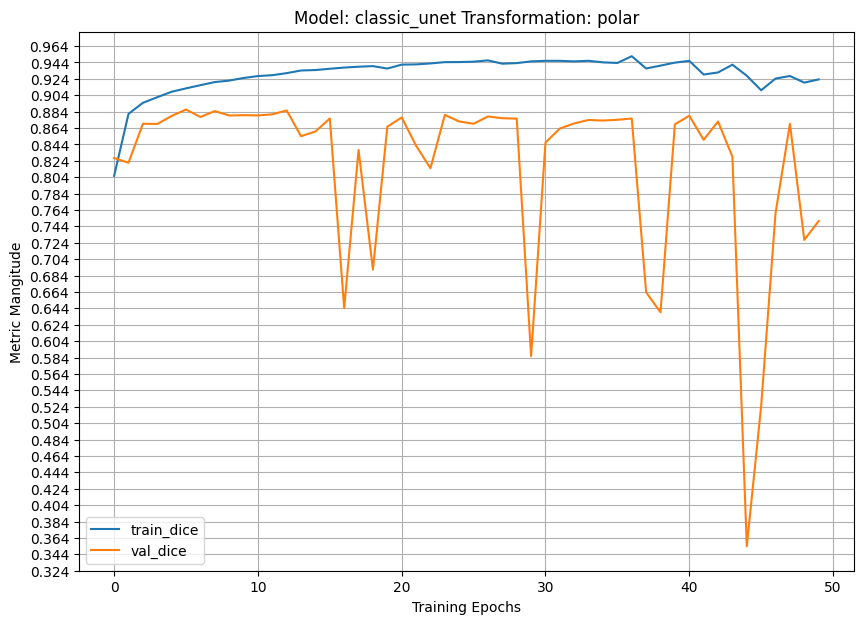

In [178]:
plot_train_val_metrics(
    experiment_config=polar_experiment_config,
    experiment_data = polar_experiment_history,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

In [11]:
CARTHESIAN_EXPERIMENT_ROOT_PATH = "../experiments_data/set_3_1/experiment_1/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
carthesian_experiment_config = load_experiment_config(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
carthesian_experiment_history = load_experiment_data(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'hflip', 'vflip'],
                     'batch_size': 64,
                     'class_weights': [1, 1],
                     'crop_size': [256, 256],
                     'data': 'lesion',
                     'gamma': 1,
                     'gpu': 0,
                     'l2_reg': 0,
                     'loss_func': 'multiclass_combined',
                     'lr': 0.001,
                     'model': 'classic_unet',
                     'no_standardize': False,
                     'num_classes': 2,
                     'num_epochs': 50,
                     'num_out_classes': 2,
                     'num_workers': 8,
                     'perc_data': 1,
                     'polar_training': False,
                     'pos_sample_chance': 1,
                     'require_one_hot': True,
                     'seed': 1,
                     'step_size': [30, 60, 90],


Best Metrics
{'train_dice': 0.904, 'val_dice': 0.7536}


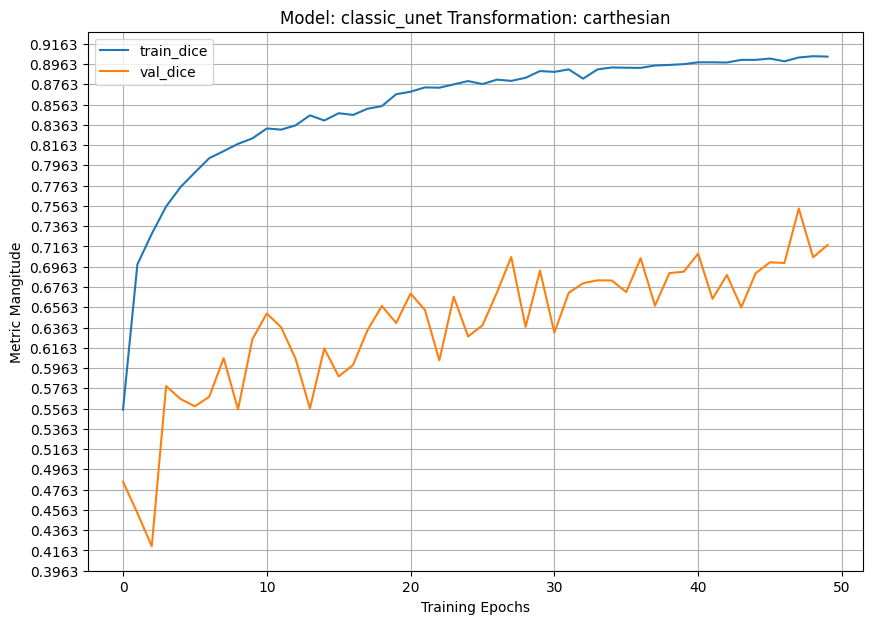

In [180]:
plot_train_val_metrics(
    experiment_config=carthesian_experiment_config,
    experiment_data = carthesian_experiment_history,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

## Cross Experiments

<font size="5">
Compare performance of model training on carthesian coordinates vs model training on polar coordinates
</font>

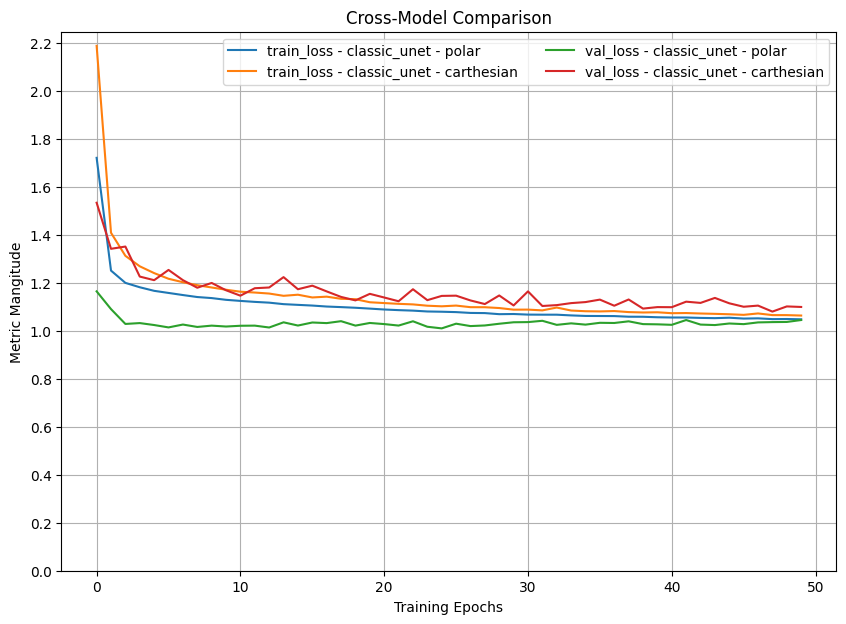

In [181]:
plot_cross_experiments_metrics(
    experiment_configs=[polar_experiment_config, carthesian_experiment_config],
    experiments_data=[polar_experiment_history, carthesian_experiment_history],
    metric_names=["train_loss", "val_loss"]
    )

# Lesion Segmentation Test Performance

## 3DIRCADB - All samples in all volumes

In [17]:
TEST_RESULTS_DIRNAME = "test_results_ACADTUM_Positive"
TEST_METRICS_FILENAME = "test_metrics.csv"

carthesian_test_metrics = pd.read_csv(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)
polar_test_metrics = pd.read_csv(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)

# plot_cross_experiments_test_metrics(
#     experiment_configs=[polar_experiment_config, carthesian_experiment_config],
#     experiments_data=[polar_test_metrics, carthesian_test_metrics],
#     metric_names=["test_recall"],
#     legend_columns=1
#     )

In [32]:
np.mean(polar_test_metrics["test_dice"])

0.08523709258509923

## 3DIRCADB - Positive samples in all volumes

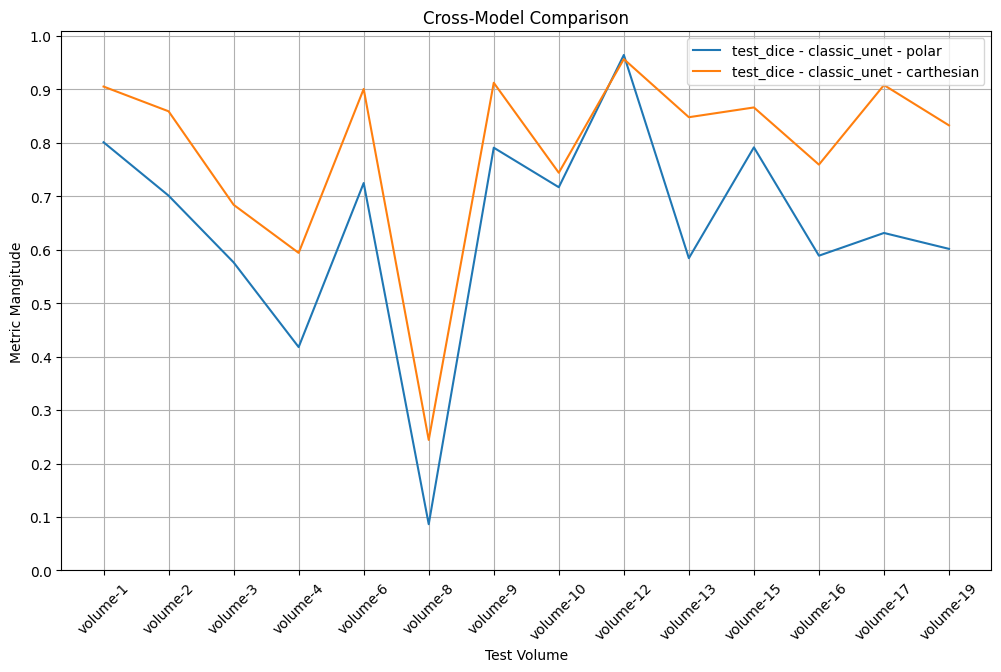

In [101]:
TEST_RESULTS_DIRNAME = "test_results_3DIRCADB_Positive"
TEST_METRICS_FILENAME = "test_metrics.csv"

carthesian_test_metrics = pd.read_csv(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)
polar_test_metrics = pd.read_csv(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)

plot_cross_experiments_test_metrics(
    experiment_configs=[polar_experiment_config, carthesian_experiment_config],
    experiments_data=[polar_test_metrics, carthesian_test_metrics],
    metric_names=["test_dice"],
    legend_columns=1
    )

In [121]:
np.mean(polar_test_metrics["test_auc_score"])

0.5

## ACADTUM - Positive samples in all volumes

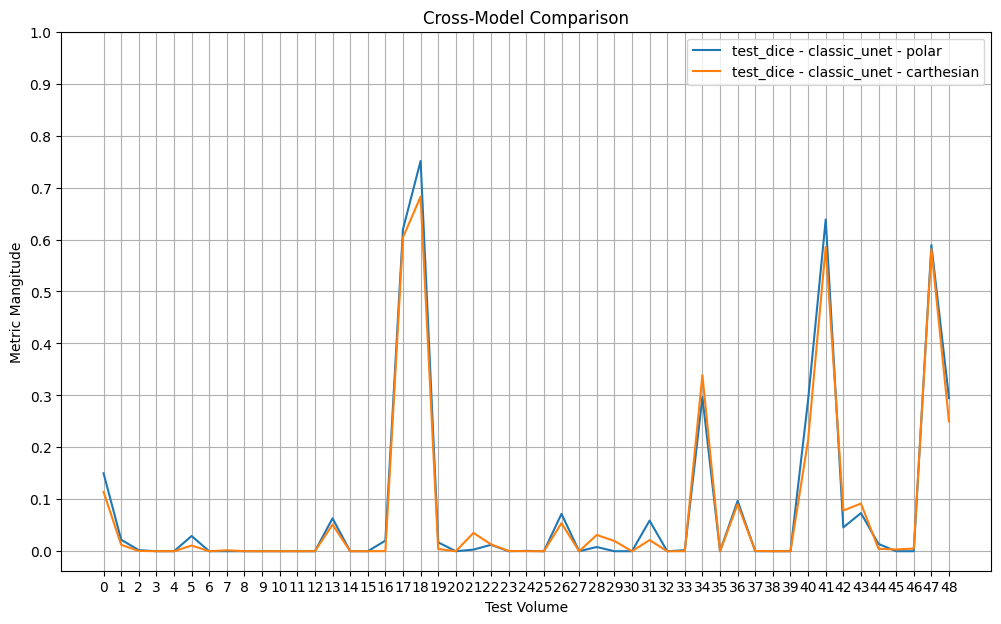

In [123]:
TEST_RESULTS_DIRNAME = "test_results_ACADTUM_Positive"
TEST_METRICS_FILENAME = "test_metrics.csv"

carthesian_test_metrics = pd.read_csv(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)
polar_test_metrics = pd.read_csv(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)

plot_cross_experiments_test_metrics(
    experiment_configs=[polar_experiment_config, carthesian_experiment_config],
    experiments_data=[polar_test_metrics, carthesian_test_metrics],
    metric_names=["test_dice"],
    legend_columns=1,
    volumes_no=49,
    show_volume_names=False
    )

In [137]:
np.mean(polar_test_metrics["test_auc_score"])

0.5

## All samples in all volumes

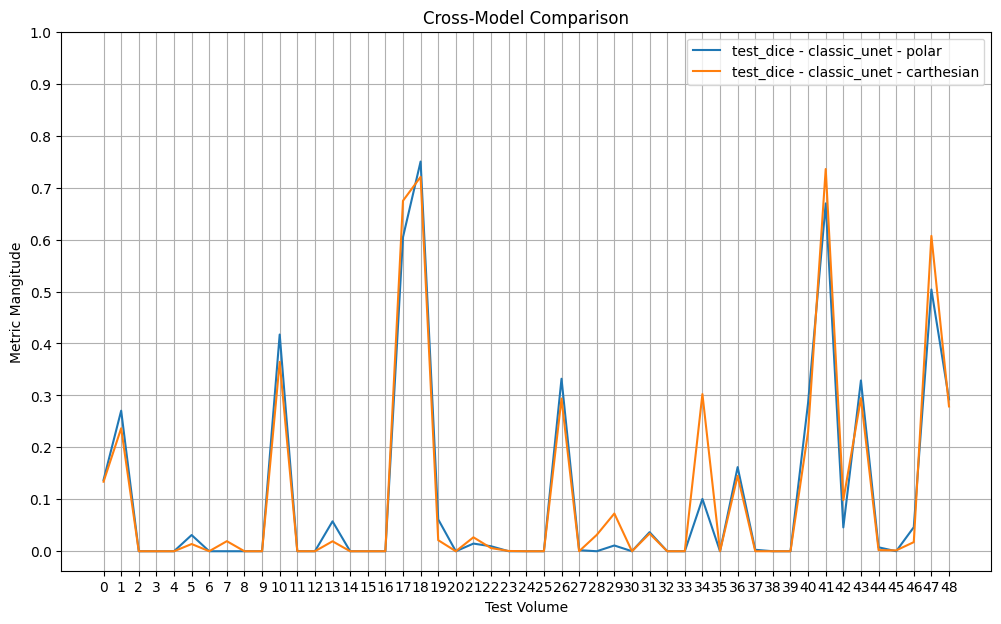

In [23]:
TEST_RESULTS_DIRNAME = "test_results_ACADTUM_Positive_2"
TEST_METRICS_FILENAME = "test_metrics.csv"

carthesian_test_metrics = pd.read_csv(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)
polar_test_metrics = pd.read_csv(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)

plot_cross_experiments_test_metrics(
    experiment_configs=[polar_experiment_config, carthesian_experiment_config],
    experiments_data=[polar_test_metrics, carthesian_test_metrics],
    metric_names=["test_dice"],
    legend_columns=1,
    volumes_no=49,
    show_volume_names=False
    )

In [25]:
np.mean(carthesian_test_metrics["test_dice"])

0.10994740476860809

# Investigate the comparison between samples in the 3 datasets

In [138]:
def set_bounds(image,min_bound,max_bound):
    """
    Clip image to lower bound min_bound, upper bound max_bound.
    """
    return np.clip(image, min_bound, max_bound)

def normalize(image,use_bd=True,zero_center=True,unit_variance=True,supply_mode="orig"):
    """
    Perform standardization/normalization, i.e. zero_centering and Setting
    the data to unit variance.
    Input Arguments are self-explanatory except for:
    supply_mode: Describes the type of LiTS-Data, i.e. whether it has been
                 rescaled/resized or not. See >Basic_Parameter_Values<
    """
    min_bound, max_bound = None, None
    if not use_bd:
        min_bound = np.min(image)
        max_bound = np.max(image)
    else:
        min_bound = float(-100)
        max_bound = float(400)
        image = set_bounds(image, min_bound, max_bound)

    image = (image - min_bound) / (max_bound - min_bound)
    image = np.clip(image,0.,1.)
    
    if zero_center:
        image = image - 0.1021
    if unit_variance:
        image = image / 0.19177
    return image

def reorient_to_match_training(data_array):
    return np.flipud(np.rot90(data_array, 3))

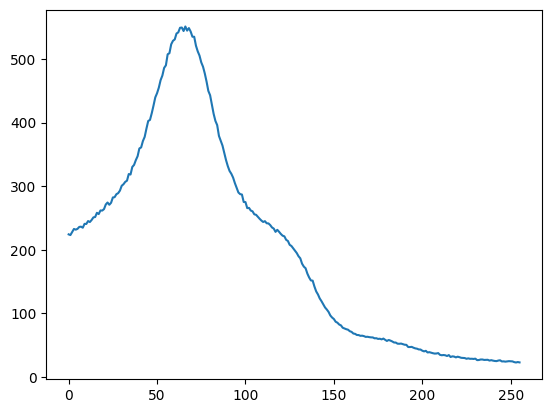

In [169]:
ircadb_mask_vol_path = "/home/tvlad/Downloads/test_dataset_3DIRCADB/Test_Data_3Dircadb1/LesionMasks/volume-12"
ircadb_slice_vol_path = "/home/tvlad/Downloads/test_dataset_3DIRCADB/Test_Data_3Dircadb1/Volumes/volume-12"

hists = []
for slice_name, mask_name in zip(os.listdir(ircadb_slice_vol_path), os.listdir(ircadb_mask_vol_path)):
    mask = np.load(os.path.join(ircadb_mask_vol_path, mask_name))
    if np.count_nonzero(mask) > 0:
        slice = np.load(os.path.join(ircadb_slice_vol_path, slice_name))
        lits_hist, _ = np.histogram(slice.ravel(), bins=256, range=[0, 255])
        hists.append(lits_hist)

ircadb_hists = np.array(hists)
ircadb_mean_hist = np.mean(ircadb_hists, axis=0)
plt.figure()
plt.plot(ircadb_mean_hist)

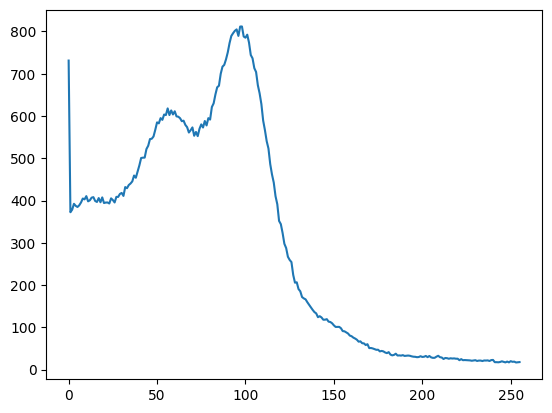

In [172]:
lits_mask_vol_path = "/home/tvlad/Projects/unet-lits-2d-pipeline/Data_Preparation/../LOADDATA/Training_Data_2D/LesionMasks/volume-75/"
lits_slice_vol_path = "/home/tvlad/Projects/unet-lits-2d-pipeline/Data_Preparation/../LOADDATA/Training_Data_2D/Volumes/volume-75/"

hists = []
for slice_name, mask_name in zip(os.listdir(lits_slice_vol_path), os.listdir(lits_mask_vol_path)):
    mask = np.load(os.path.join(lits_mask_vol_path, mask_name))
    if np.count_nonzero(mask) > 0:
        slice = np.load(os.path.join(lits_slice_vol_path, slice_name))
        lits_hist, _ = np.histogram(slice.ravel(), bins=256, range=[0, 255])
        hists.append(lits_hist)

lits_hists = np.array(hists)
lits_mean_hist = np.mean(hists, axis=0)
plt.figure()
plt.plot(lits_mean_hist)

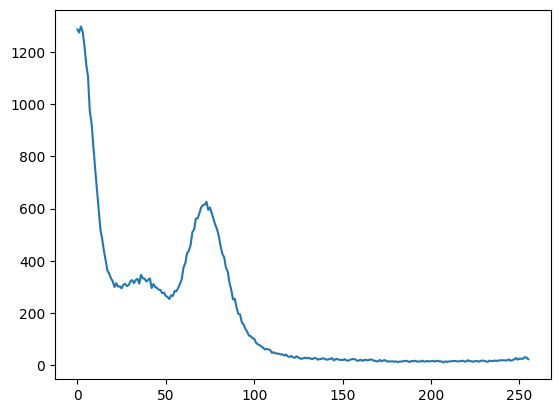

In [173]:
acadtum_mask_vol_path = "/home/tvlad/Downloads/test_dataset_ACADTUM/masks/MIC_NASTASIA_nodul_displazic_segm_2_MIC_NASTASIA_Jun_28__2020_[6]_CT_Arterial__3_0__I3__55e77a1d"
acadtum_slice_vol_path = "/home/tvlad/Downloads/test_dataset_ACADTUM/volumes/MIC_NASTASIA_nodul_displazic_segm_2_MIC_NASTASIA_Jun_28__2020_[6]_CT_Arterial__3_0__I31s__3_"

hists = []
for slice_name, mask_name in zip(os.listdir(acadtum_slice_vol_path), os.listdir(acadtum_mask_vol_path)):
    mask = np.load(os.path.join(acadtum_mask_vol_path, mask_name))
    if np.count_nonzero(mask) > 0:
        slice = np.load(os.path.join(acadtum_slice_vol_path, slice_name))
        lits_hist, _ = np.histogram(slice.ravel(), bins=256, range=[0, 255])
        hists.append(lits_hist)

acadtum_hists = np.array(hists)
acadtum_mean_hist = np.mean(acadtum_hists, axis=0)
plt.figure()
plt.plot(acadtum_mean_hist)

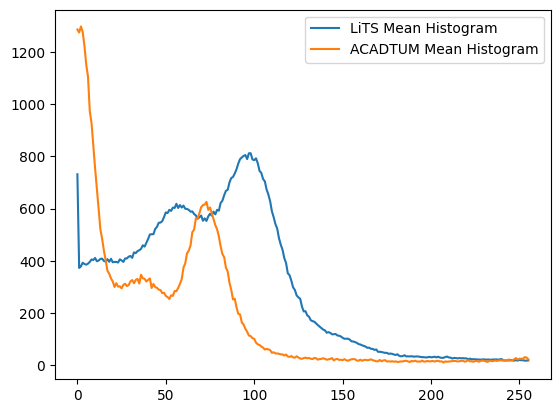

In [174]:
plt.figure()
plt.plot(lits_mean_hist, label="LiTS Mean Histogram")
plt.plot(acadtum_mean_hist, label="ACADTUM Mean Histogram")
plt.legend()

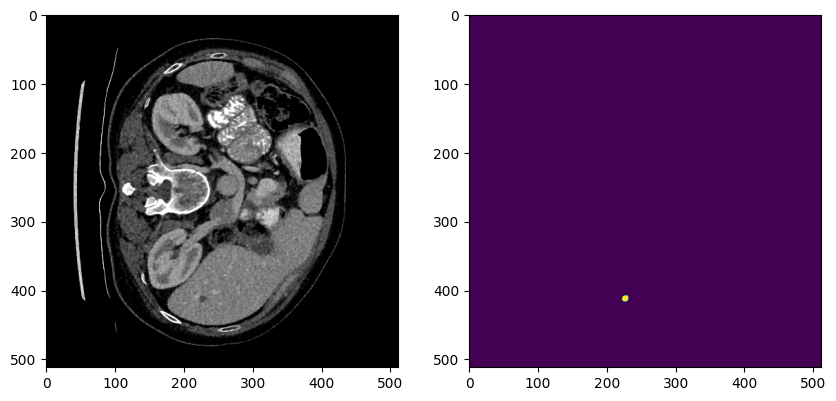

In [175]:
lits_mask = np.load("/home/tvlad/Projects/unet-lits-2d-pipeline/Data_Preparation/../LOADDATA/Training_Data_2D/LesionMasks/volume-112/slice-368.npy")
lits_sample = np.load("/home/tvlad/Projects/unet-lits-2d-pipeline/Data_Preparation/../LOADDATA/Training_Data_2D/Volumes/volume-112/slice-368.npy")

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(normalize(lits_sample, zero_center=False, unit_variance=False), cmap="gray")
axs[1].imshow(lits_mask)
# fig.suptitle("LiTS")

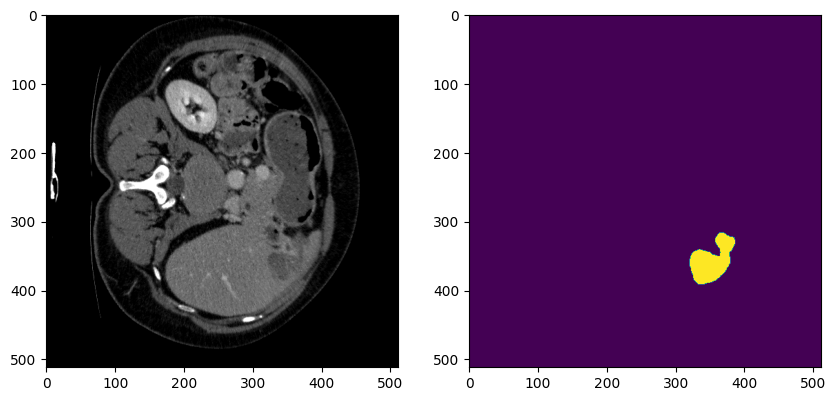

In [140]:
ircadb_mask = np.load("/home/tvlad/Downloads/test_dataset_3DIRCADB/Test_Data_3Dircadb1/LesionMasks/volume-1/slice-54.npy")
ircadb_sample = np.load("/home/tvlad/Downloads/test_dataset_3DIRCADB/Test_Data_3Dircadb1/Volumes/volume-1/slice-54.npy")

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(normalize(reorient_to_match_training(ircadb_sample), zero_center=False, unit_variance=False), cmap="gray")
axs[1].imshow(reorient_to_match_training(ircadb_mask))

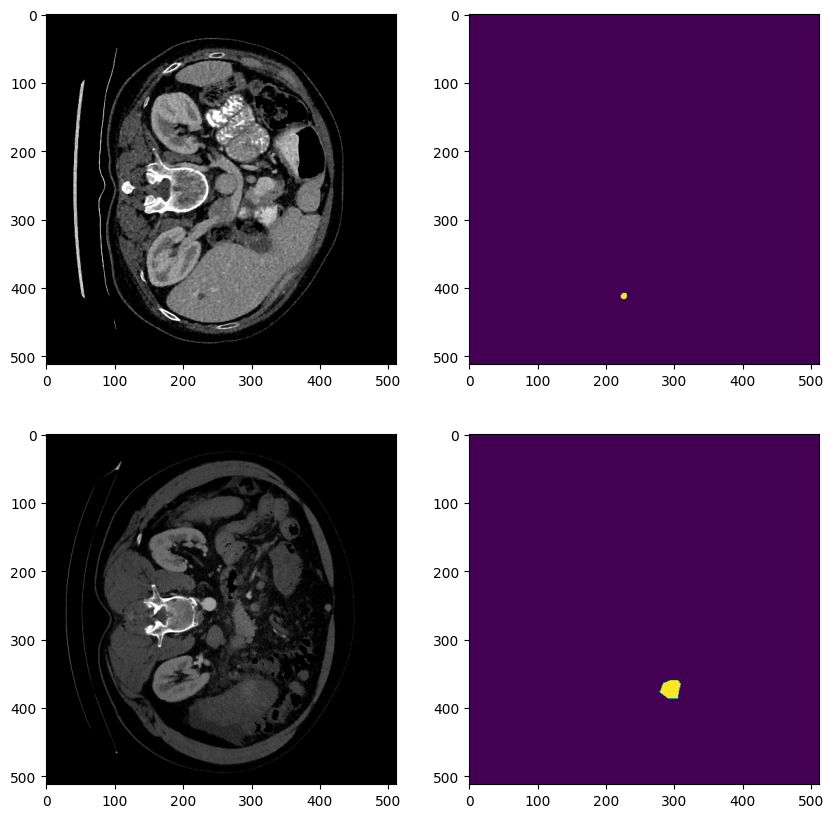

In [176]:
acadtum_mask = np.load("/home/tvlad/Downloads/test_dataset_ACADTUM/masks/VACARIU_SILVIU_HCC_sg_5_6_VACARIU_SILVIU_Jan_14__2020_[6]_CT_Arterial__3_0__I3__554c4c71/slice-82.npy")
acadtum_sample = np.load("/home/tvlad/Downloads/test_dataset_ACADTUM/volumes/VACARIU_SILVIU_HCC_sg_5-6_VACARIU_SILVIU_Jan_14__2020_[6]_CT_Arterial__3_0__I31s__3_/slice-82.npy")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(normalize(lits_sample), cmap="gray")
axs[0, 1].imshow(lits_mask)
axs[1, 0].imshow(normalize(acadtum_sample), cmap="gray")
axs[1, 1].imshow(acadtum_mask)

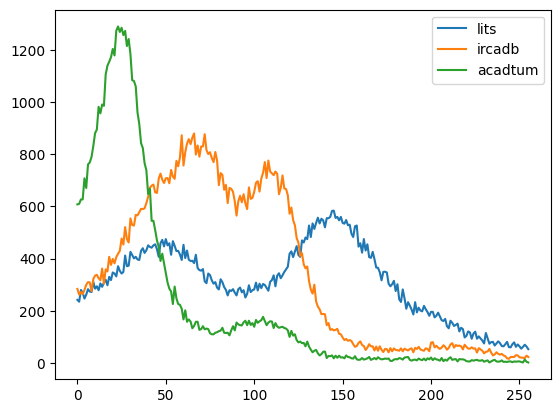

In [21]:
lits_hist, lits_bins = np.histogram(lits_sample.ravel(), bins=256, range=[0, 255])
ircadb_hist, ircadb_bins = np.histogram(ircadb_sample.ravel(), bins=256, range=[0, 255])
acadtum_hist, acadtum_bins = np.histogram(acadtum_sample.ravel(), bins=256, range=[0, 255])
plt.plot(lits_hist, label="lits")
plt.plot(ircadb_hist, label="ircadb")
plt.plot(acadtum_hist, label="acadtum")
plt.legend()